<a href="https://colab.research.google.com/github/harshad-leo/CE888/blob/main/lab6/Lab_6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 6: Exercise to be completed

### Task 7: To complete this task, please create a new notebook in Google Colab. 

Note: Please create a new notebook for this task.

Your data is stored in Lab_6/Data folder. There are two .csv files: 1) Country-data.csv and 2) data-dictionary.csv. Please explore the data and use any clustering method to find the list of countries, which can categorised as follows:

| S.No      | Categories |
| ----------- | ----------- |
| 1   | under-developing country |
| 2   | developing country       |
| 3   | developed country        |


Note: please justify your reason, why and how you have concluded your answer. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
country_data = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Cluster data using KMeans algorithm

In [ ]:
# Fetch data into x and y variables
x=country_data.iloc[:,1:10] # Covariates or input
y=country_data['gdpp'] # Labels or classes or output
print(x.columns)
print(y)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
0        553
1       4090
2       4460
3       3530
4      12200
       ...  
162     2970
163    13500
164     1310
165     1310
166     1460
Name: gdpp, Length: 167, dtype: int64


In [ ]:
# Convert the data into arrays
x = np.array(x)
y = np.array(y)


In [ ]:
kmeans_algo = cluster.KMeans(n_clusters=3)
kmeans_algo.fit(x)
kmeans_algo.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
country_data['categories'] = kmeans_algo.labels_

In [ ]:
country_data.loc[country_data.categories == 2, 'categories'] = 'under-developing country'
country_data.loc[country_data.categories == 1, 'categories'] = 'developing country'
country_data.loc[country_data.categories == 0, 'categories'] = 'developed country'

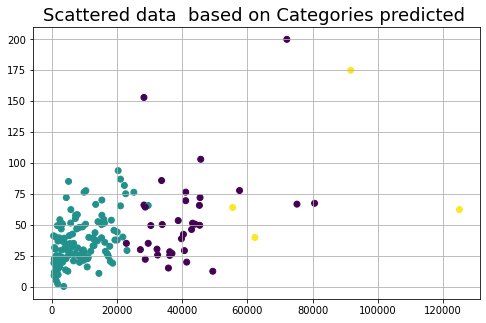

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Scattered data  based on Categories predicted ", fontsize=18)
plt.grid(True)
plt.scatter(country_data['income'],country_data['exports'],c=kmeans_algo.labels_)
plt.savefig('KCluster.png', dpi=300)
plt.show()

In order to categorise a country into developed ,developing and under-developed countries ,GDP is important factor
As you can see in the plot we K means cluster.